In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 利用领域知识手工构建特征

## 1. 数据准备

In [4]:
citibike_data = pd.read_csv("datasets/citibike.csv")
citibike_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,3117,8/1/2015 01:19:15,8/1/2015 02:11:12,301,E 2 St & Avenue B,40.722174,-73.983688,301,E 2 St & Avenue B,40.722174,-73.983688,18070,Subscriber,1986.0,1
1,690,8/1/2015 01:27:30,8/1/2015 01:39:00,301,E 2 St & Avenue B,40.722174,-73.983688,349,Rivington St & Ridge St,40.718502,-73.983299,19699,Subscriber,1985.0,1
2,727,8/1/2015 01:38:49,8/1/2015 01:50:57,301,E 2 St & Avenue B,40.722174,-73.983688,2010,Grand St & Greene St,40.721655,-74.002347,20953,Subscriber,1982.0,1
3,698,8/1/2015 06:06:41,8/1/2015 06:18:20,301,E 2 St & Avenue B,40.722174,-73.983688,527,E 33 St & 2 Ave,40.744023,-73.976056,23566,Subscriber,1976.0,1
4,351,8/1/2015 06:24:29,8/1/2015 06:30:21,301,E 2 St & Avenue B,40.722174,-73.983688,250,Lafayette St & Jersey St,40.724561,-73.995653,17545,Subscriber,1959.0,1


In [6]:
citibike_data.starttime.min(), citibike_data.starttime.max()

('8/1/2015 01:19:15', '8/9/2015 22:22:10')

In [9]:
pd.to_datetime(citibike_data.starttime).min()

Timestamp('2015-08-01 01:19:15')

In [8]:
pd.to_datetime(citibike_data.starttime).max()

Timestamp('2015-08-31 23:53:03')

<br>
统计每3小时使用频次的时间序列

In [18]:
citibike_data = pd.read_csv("datasets/citibike.csv")

citibike_data['one'] = 1
citibike_data['starttime'] = pd.to_datetime(citibike_data.starttime)
citibike_data = citibike_data.set_index("starttime")
citibike_data.one

starttime
2015-08-01 01:19:15    1
2015-08-01 01:27:30    1
2015-08-01 01:38:49    1
2015-08-01 06:06:41    1
2015-08-01 06:24:29    1
                      ..
2015-08-31 22:05:20    1
2015-08-31 22:34:24    1
2015-08-31 22:34:49    1
2015-08-31 22:43:27    1
2015-08-31 23:53:03    1
Name: one, Length: 4212, dtype: int64

In [21]:
citibike_data = pd.read_csv("datasets/citibike.csv")

citibike_data['one'] = 1
citibike_data['starttime'] = pd.to_datetime(citibike_data.starttime)

citibike_data = citibike_data.set_index("starttime")
citibike = citibike_data.one.resample("3h").sum().fillna(0)
citibike

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3h, Name: one, Length: 248, dtype: int64

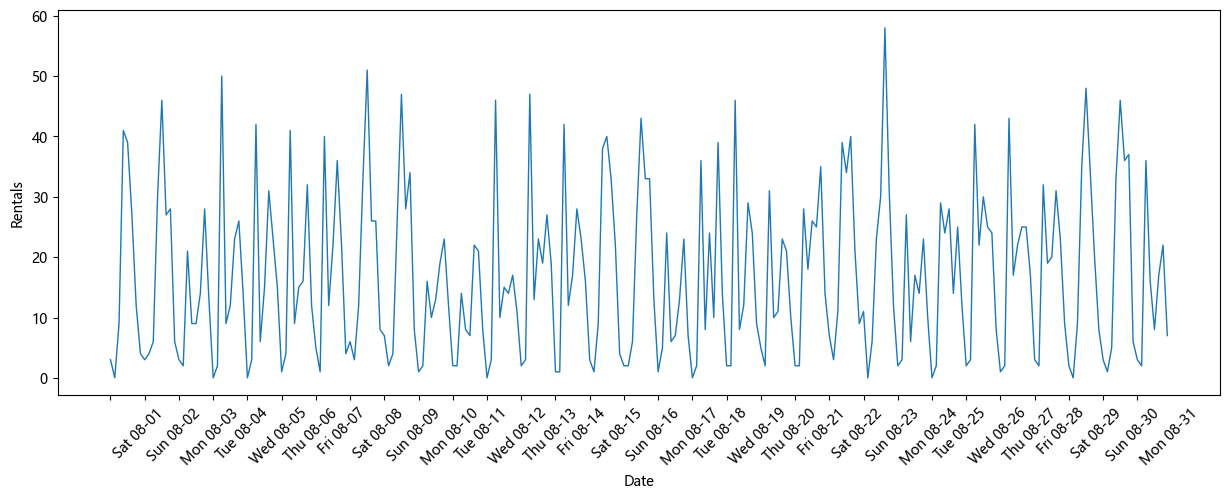

In [24]:
plt.figure(figsize=(15, 5))

xticks = pd.date_range(start=citibike.index.min(), 
                       end=citibike.index.max(),
                       freq='D')

plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=45, ha="left")

plt.plot(citibike, linewidth=1)
plt.xlabel("Date"); plt.ylabel("Rentals");

## 2. 预测使用频次

In [10]:
citibike.index

DatetimeIndex(['2015-08-01 00:00:00', '2015-08-01 03:00:00',
               '2015-08-01 06:00:00', '2015-08-01 09:00:00',
               '2015-08-01 12:00:00', '2015-08-01 15:00:00',
               '2015-08-01 18:00:00', '2015-08-01 21:00:00',
               '2015-08-02 00:00:00', '2015-08-02 03:00:00',
               ...
               '2015-08-30 18:00:00', '2015-08-30 21:00:00',
               '2015-08-31 00:00:00', '2015-08-31 03:00:00',
               '2015-08-31 06:00:00', '2015-08-31 09:00:00',
               '2015-08-31 12:00:00', '2015-08-31 15:00:00',
               '2015-08-31 18:00:00', '2015-08-31 21:00:00'],
              dtype='datetime64[ns]', name='starttime', length=248, freq='3h')

In [11]:
citibike.index.astype("int64")

Index([1438387200000000000, 1438398000000000000, 1438408800000000000,
       1438419600000000000, 1438430400000000000, 1438441200000000000,
       1438452000000000000, 1438462800000000000, 1438473600000000000,
       1438484400000000000,
       ...
       1440957600000000000, 1440968400000000000, 1440979200000000000,
       1440990000000000000, 1441000800000000000, 1441011600000000000,
       1441022400000000000, 1441033200000000000, 1441044000000000000,
       1441054800000000000],
      dtype='int64', name='starttime', length=248)

In [12]:
y = citibike.values 

# 将 POSIX时间转换到秒
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9 

In [14]:
print(X.shape, y.shape)

(248, 1) (248,)


In [42]:
date_ticks

Index(['Sat 08-01', 'Sat 08-01', 'Sat 08-01', 'Sat 08-01', 'Sat 08-01',
       'Sat 08-01', 'Sat 08-01', 'Sat 08-01', 'Sun 08-02', 'Sun 08-02',
       ...
       'Sun 08-30', 'Sun 08-30', 'Mon 08-31', 'Mon 08-31', 'Mon 08-31',
       'Mon 08-31', 'Mon 08-31', 'Mon 08-31', 'Mon 08-31', 'Mon 08-31'],
      dtype='object', name='starttime', length=248)

In [15]:
from sklearn.metrics import r2_score

n_train = 186 # 前75%数据作为训练，后25%做测试

date_ticks = citibike.index.strftime('%a %m-%d')

def eval_on_features(features, target, regmodel):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regmodel.fit(X_train, y_train)

    rsquared = r2_score(y_train, regmodel.predict(X_train))
    print(f"Train R-squared: {rsquared :.2f}")
    
    rsquared = r2_score(y_test, regmodel.predict(X_test))
    print(f"Test R-squared: {rsquared :.2f}")
    
    y_pred = regmodel.predict(X_test)
    y_pred_train = regmodel.predict(X_train)
    
    plt.figure(figsize=(18, 6))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=45,ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    

Train R-squared: 0.86
Test R-squared: -1.20


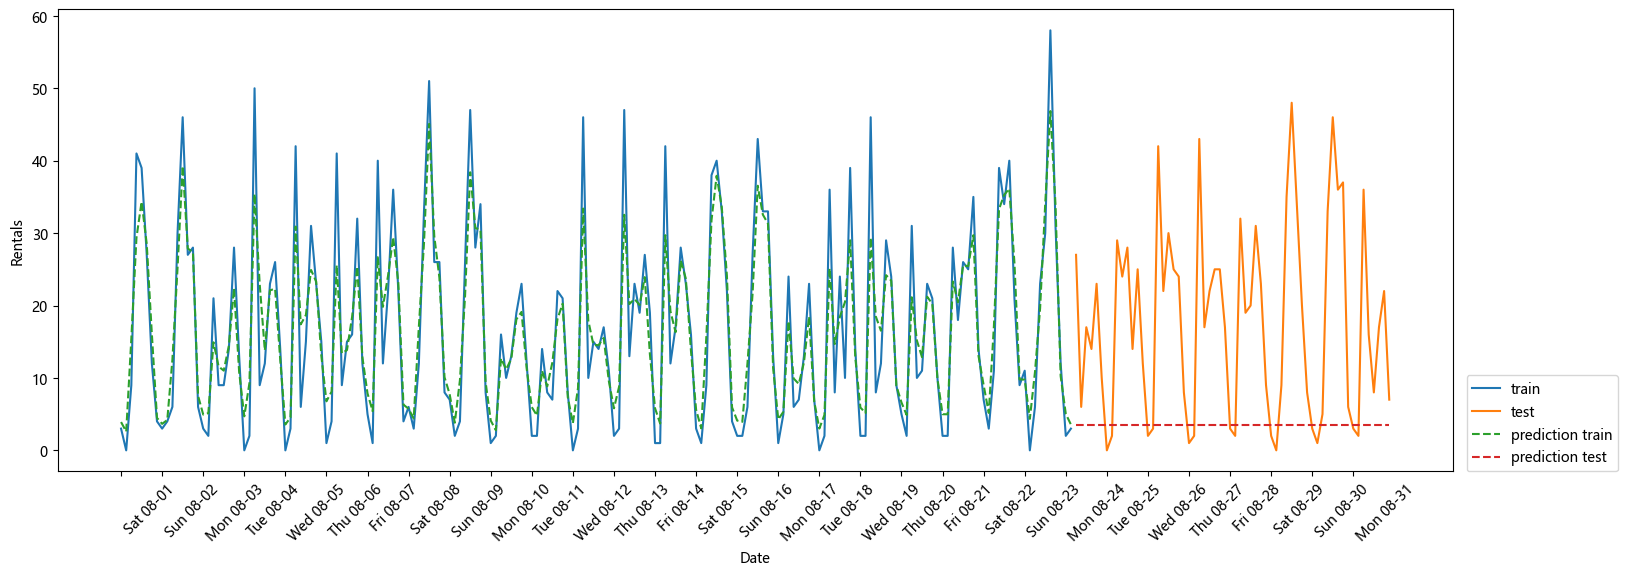

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

eval_on_features(X, y, rf_model)

### 按时钟点

In [17]:
np.unique(citibike.index.hour)

array([ 0,  3,  6,  9, 12, 15, 18, 21], dtype=int32)

In [18]:
citibike.index.hour

Index([ 0,  3,  6,  9, 12, 15, 18, 21,  0,  3,
       ...
       18, 21,  0,  3,  6,  9, 12, 15, 18, 21],
      dtype='int32', name='starttime', length=248)

Train R-squared: 0.50
Test R-squared: 0.58


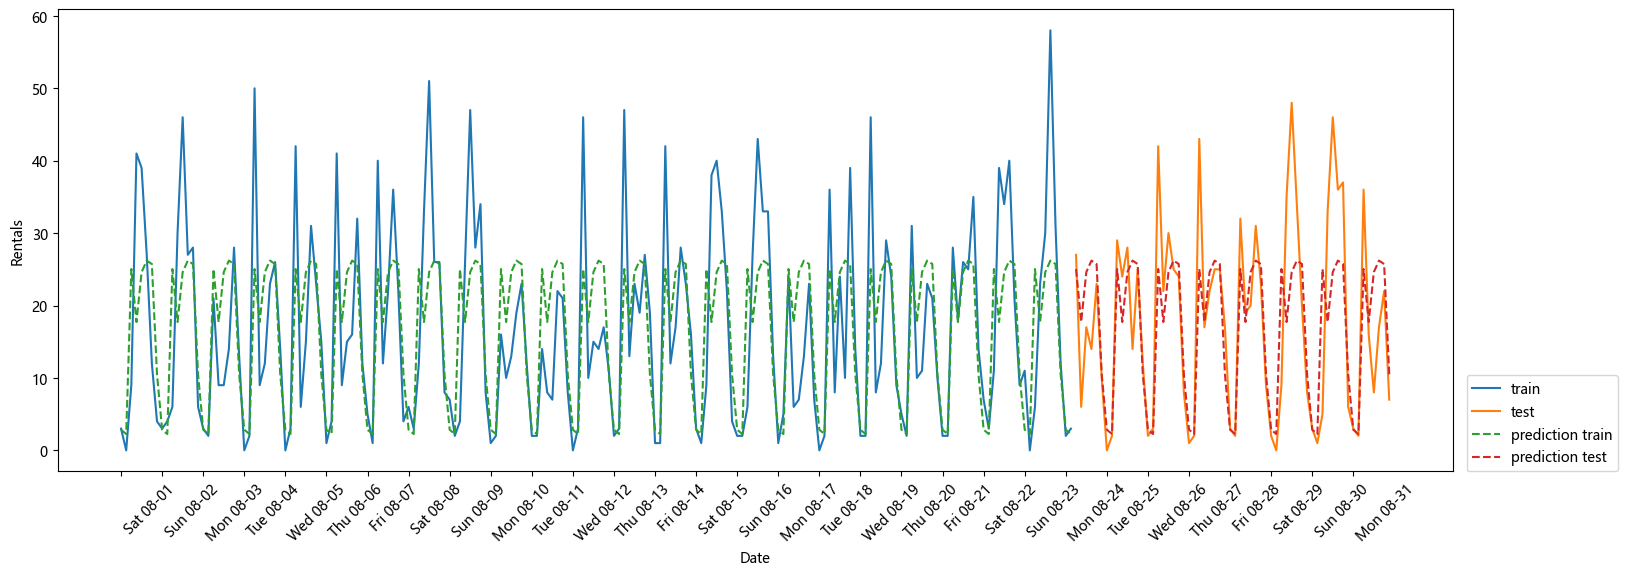

In [18]:
X_hour = citibike.index.hour.values.reshape(-1, 1) 

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X_hour, y, rf_model)

### 将数据组织成小时、周的安排

In [58]:
np.unique(citibike.index.dayofweek)

array([0, 1, 2, 3, 4, 5, 6])

In [23]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])

X_hour_week[:12,:]

array([[ 5,  0],
       [ 5,  3],
       [ 5,  6],
       [ 5,  9],
       [ 5, 12],
       [ 5, 15],
       [ 5, 18],
       [ 5, 21],
       [ 6,  0],
       [ 6,  3],
       [ 6,  6],
       [ 6,  9]], dtype=int32)

Train R-squared: 0.89
Test R-squared: 0.84


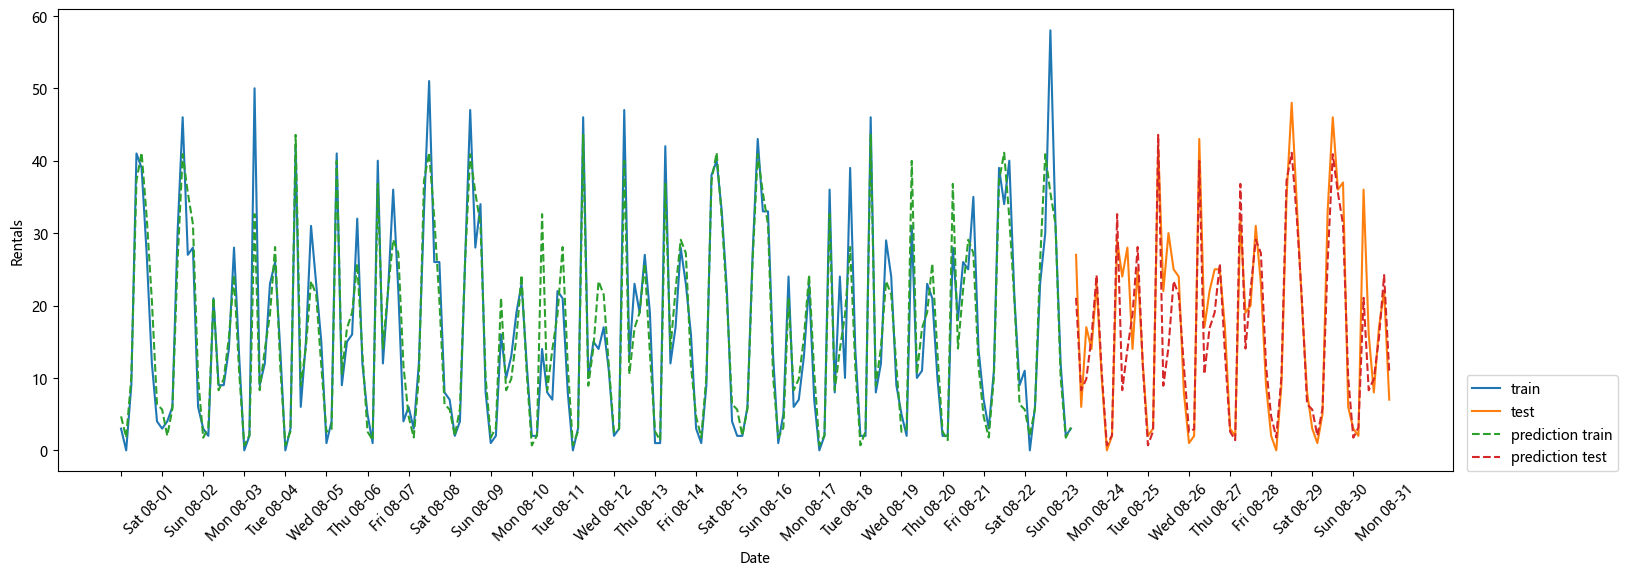

In [24]:
eval_on_features(X_hour_week, y, rf_model)

## 3. 使用支持向量机回归

Train R-squared: 1.00
Test R-squared: -0.01


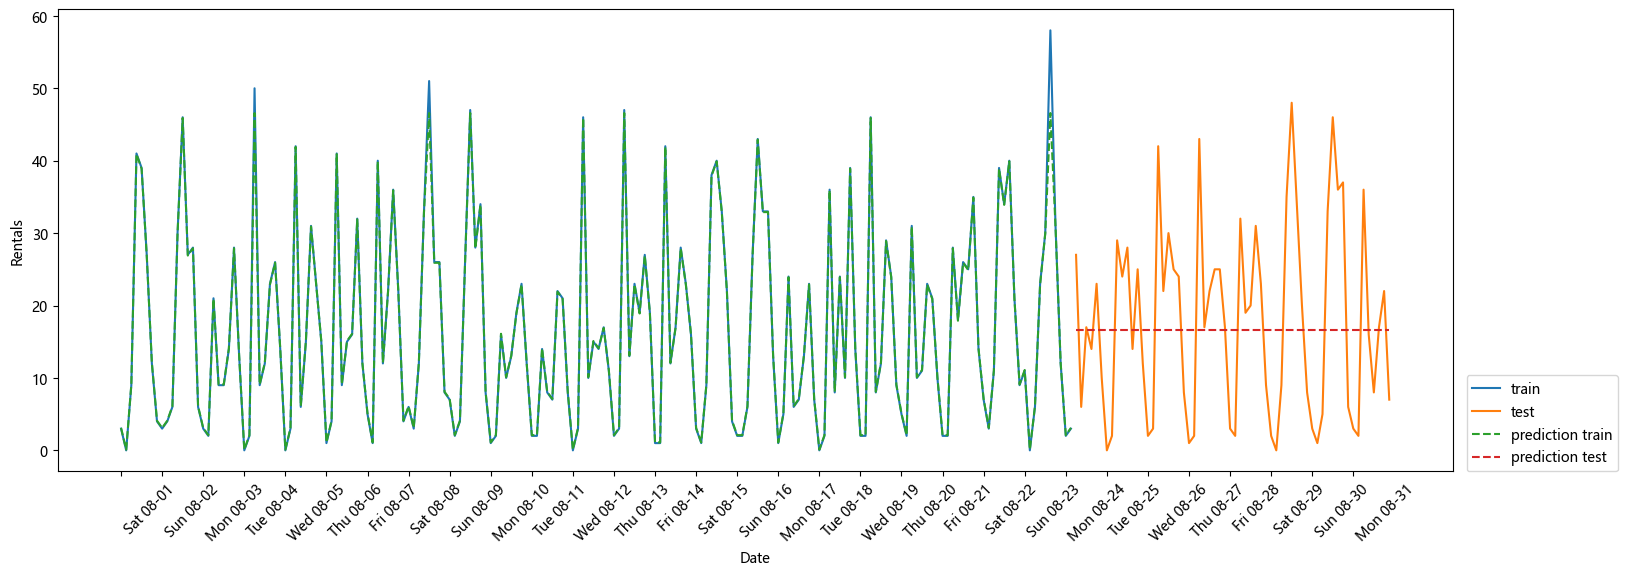

In [24]:
eval_on_features(X, y, SVR(gamma=0.25, C=30))

Train R-squared: 0.47
Test R-squared: 0.50


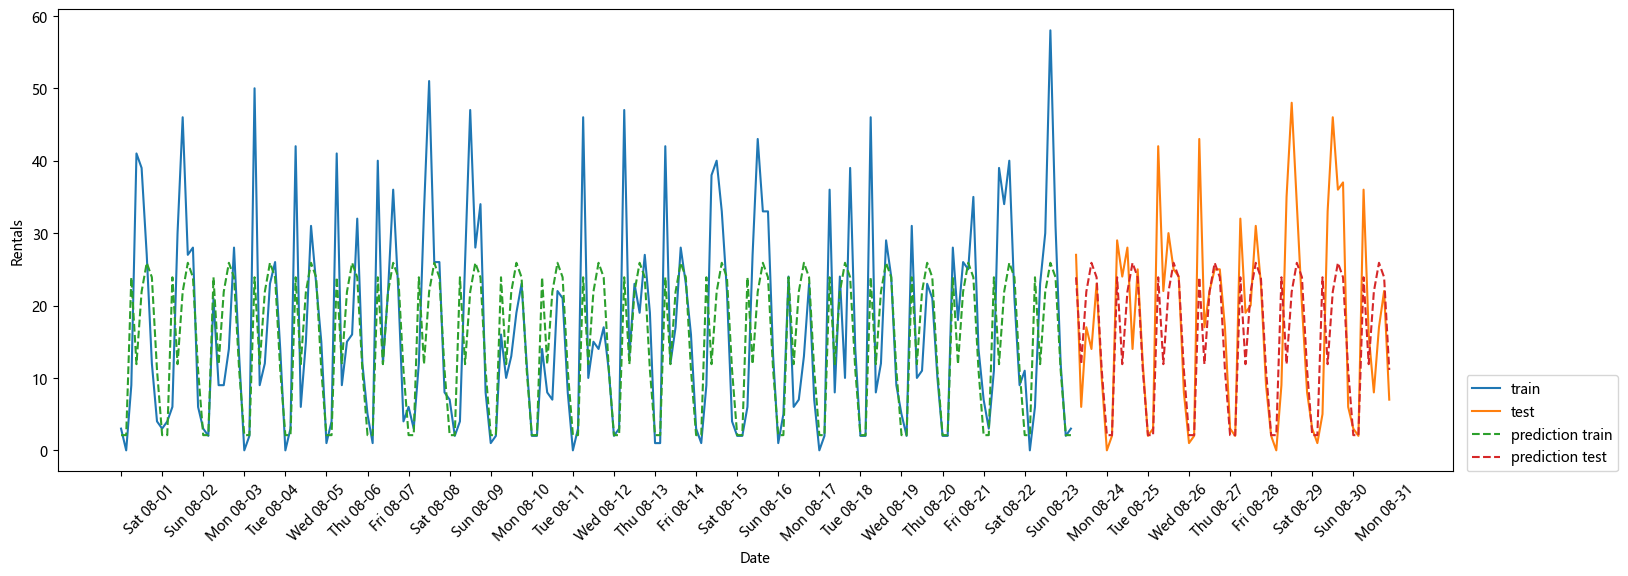

In [25]:
eval_on_features(X_hour, y, SVR(gamma=0.25, C=30))

Train R-squared: 0.86
Test R-squared: 0.82


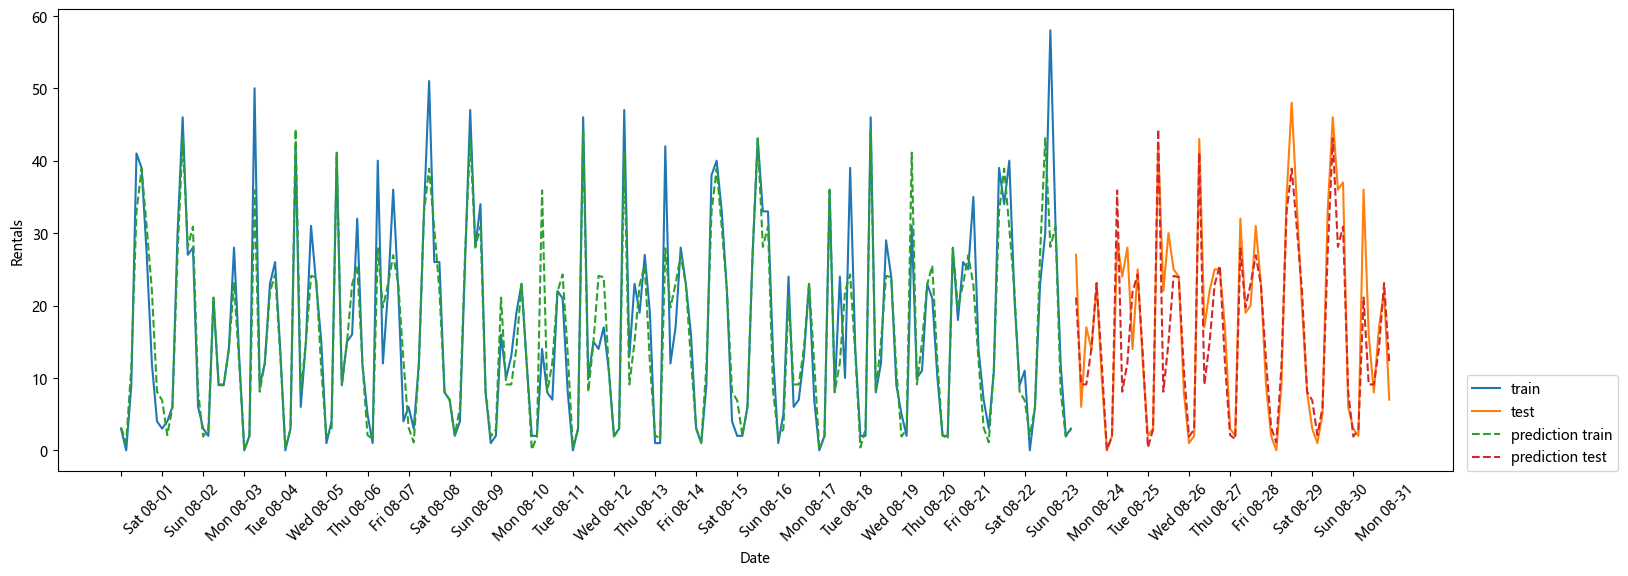

In [23]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score


eval_on_features(X_hour_week, y, SVR(gamma=0.25, C=30))

## 4. 使用线性回归模型

In [26]:
X_hour_week[:12]

array([[ 5,  0],
       [ 5,  3],
       [ 5,  6],
       [ 5,  9],
       [ 5, 12],
       [ 5, 15],
       [ 5, 18],
       [ 5, 21],
       [ 6,  0],
       [ 6,  3],
       [ 6,  6],
       [ 6,  9]], dtype=int32)

Train R-squared: 0.17
Test R-squared: 0.10


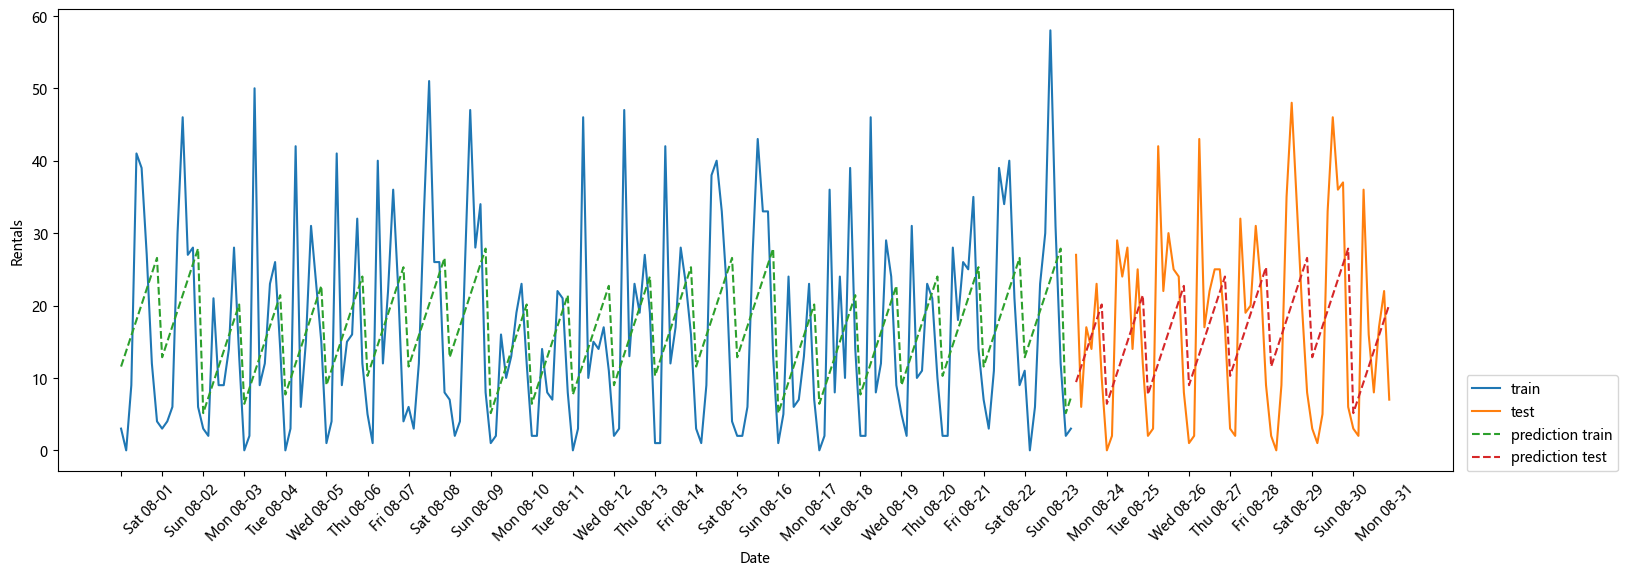

In [31]:
from sklearn.linear_model import LinearRegression

eval_on_features(X_hour_week, y, LinearRegression())

上图奇怪的趋势，因为hour和week作为整型连续数。

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')

X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Train R-squared: 0.54
Test R-squared: 0.61


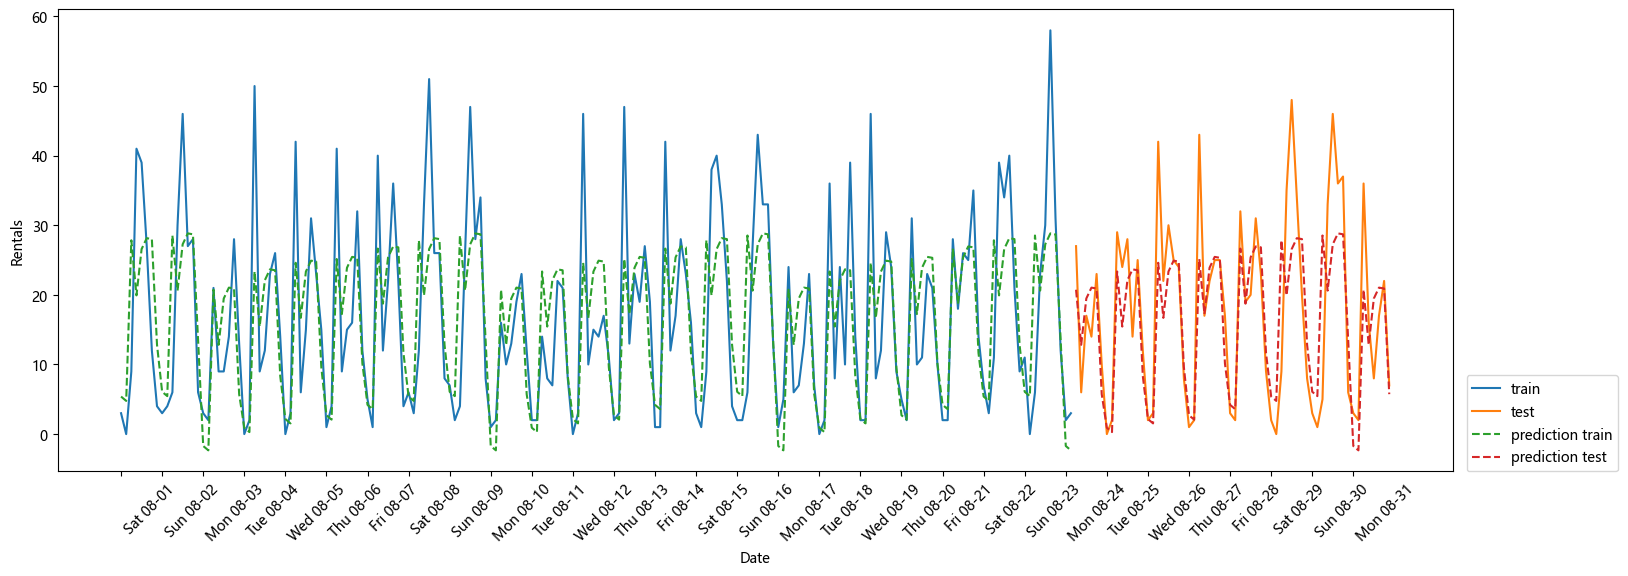

In [32]:

eval_on_features(X_hour_week_onehot, y, LinearRegression())

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)

X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)


print(X_hour_week_onehot.shape)
print(X_hour_week_onehot_poly.shape)

(248, 15)
(248, 120)


In [32]:
poly_transformer.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4',
       'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11',
       'x0 x12', 'x0 x13', 'x0 x14', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5',
       'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12',
       'x1 x13', 'x1 x14', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7',
       'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x2 x14',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10',
       'x3 x11', 'x3 x12', 'x3 x13', 'x3 x14', 'x4 x5', 'x4 x6', 'x4 x7',
       'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x4 x14',
       'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12',
       'x5 x13', 'x5 x14', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11',
       'x6 x12', 'x6 x13', 'x6 x14', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11',
       'x7 x12', 'x7 x13', 'x7 x14', 'x8 x9', 'x

Train R-squared: 0.89
Test R-squared: 0.83


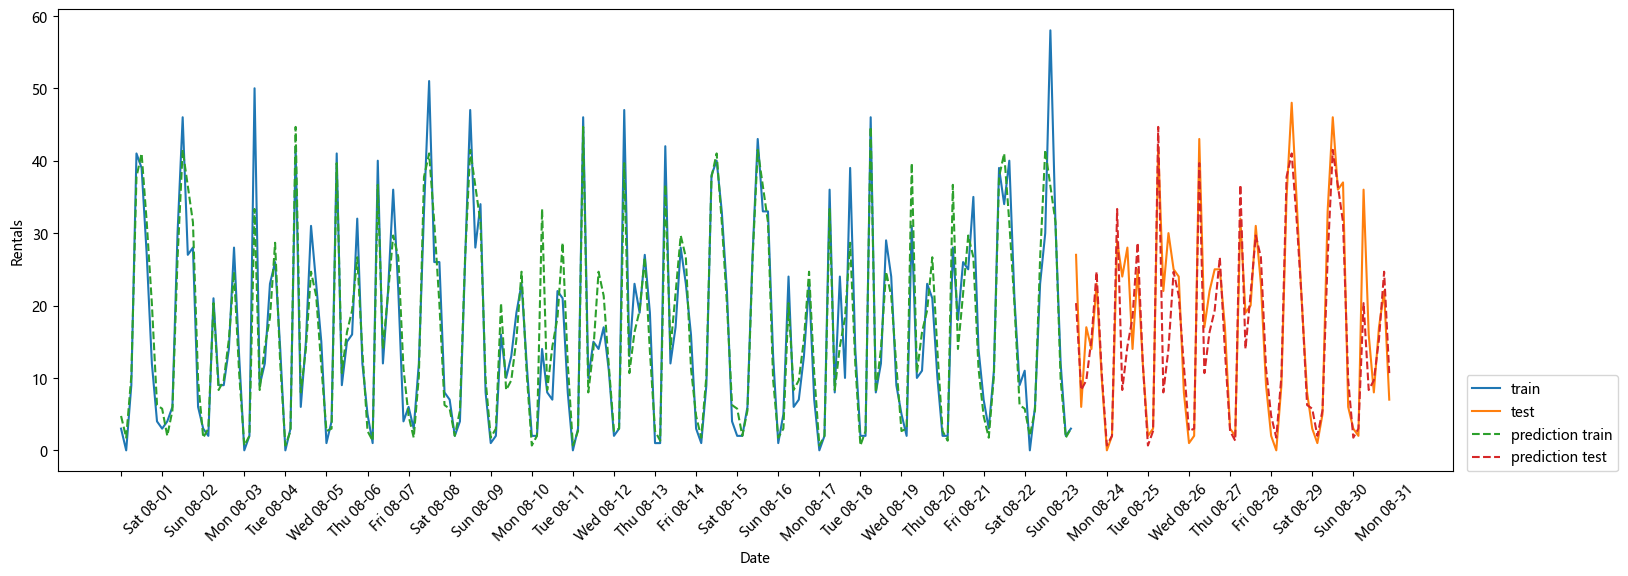

In [36]:
eval_on_features(X_hour_week_onehot_poly, y, LinearRegression())

Train R-squared: 0.87
Test R-squared: 0.84


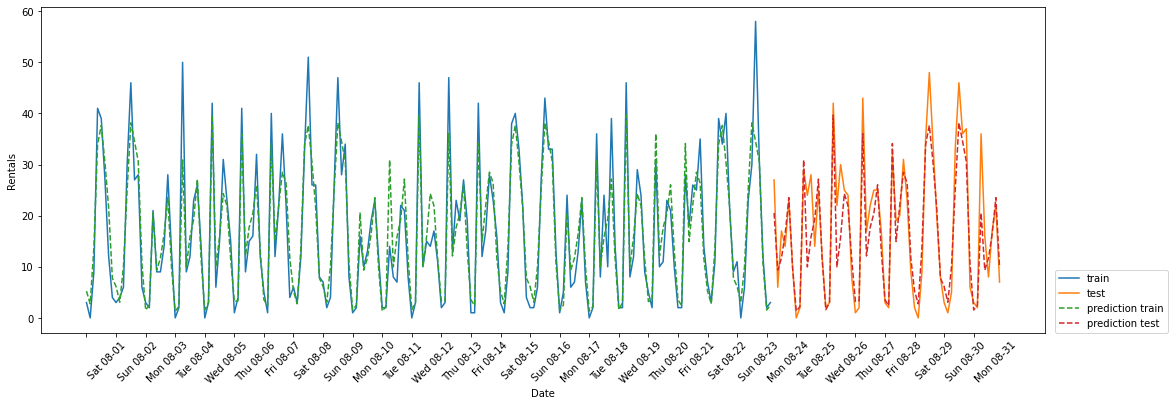

In [109]:
from sklearn.linear_model import Ridge

eval_on_features(X_hour_week_onehot_poly, y, Ridge())

Train R-squared: 0.27
Test R-squared: 0.29


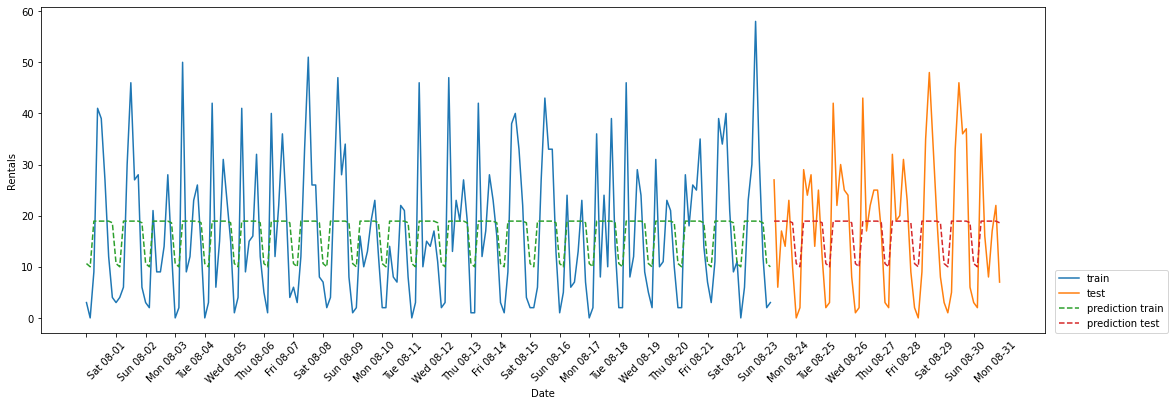

In [108]:
from sklearn.linear_model import Lasso

eval_on_features(X_hour_week_onehot_poly, y, Lasso())

## 5. 系数解读

In [124]:
from sklearn.linear_model import Ridge

lr_ridge = Ridge()
lr_ridge.fit(X_hour_week_onehot_poly, y)

Ridge()

In [116]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

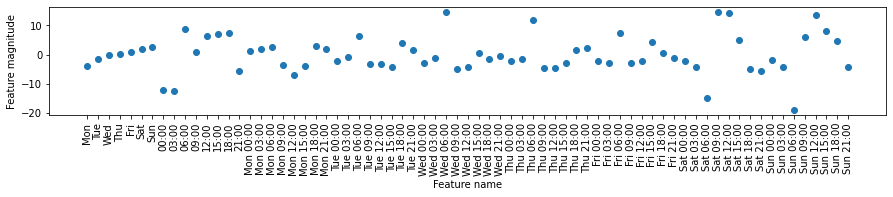

In [125]:


features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr_ridge.coef_ != 0]
coef_nonzero = lr_ridge.coef_[lr_ridge.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude");

In [129]:
np.std(lr_ridge.coef_)

4.84783008458938

### 5.2 使用OLS拟合

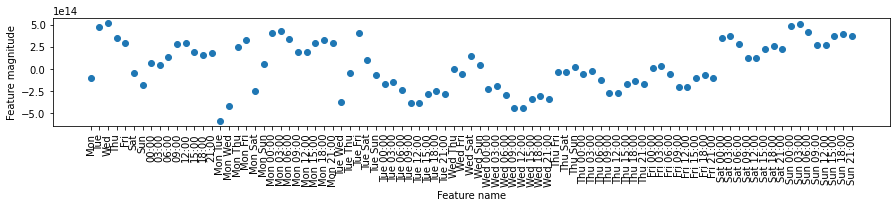

In [127]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_hour_week_onehot_poly, y)

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude");

In [128]:
np.std(lr.coef_)

233377847063394.88